<a href="https://colab.research.google.com/github/H-b-IO-T-O-H/ML_lr1/blob/main/lr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

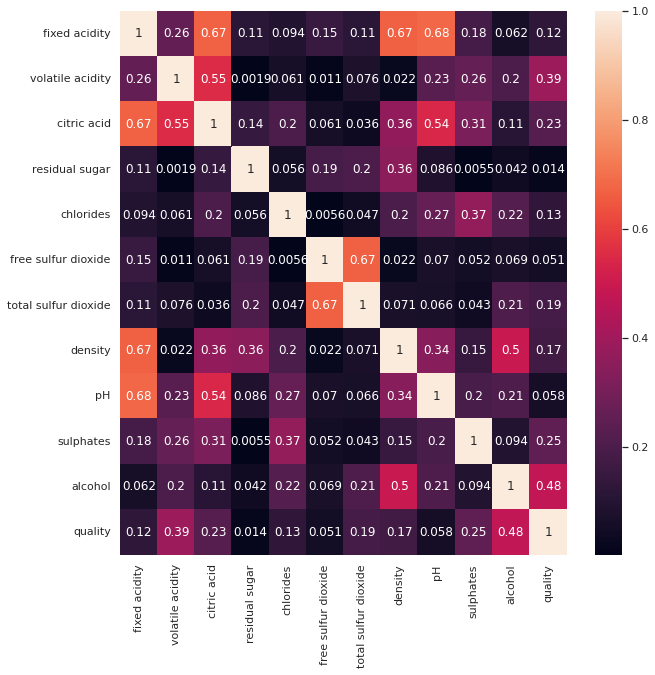

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality-red.csv', sep = ',')
#data.head(15)
#data.info()
# будем предсказывать качество вина на основании поступающих данных
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True) # сильно коррелирующих друг с другом признаков нет


# Новый раздел

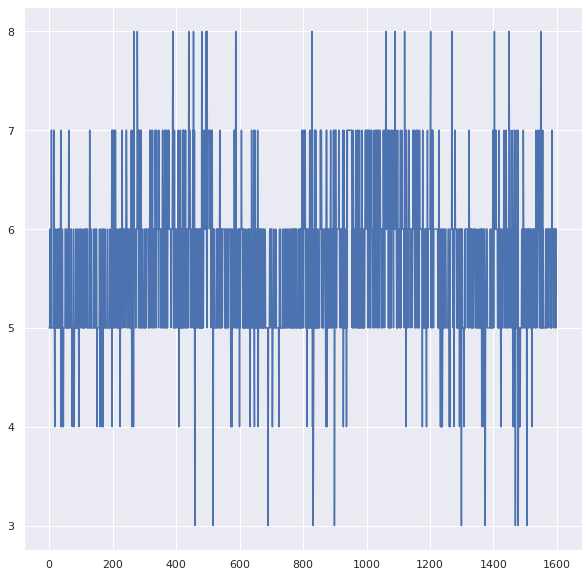

In [ ]:
#data = data.drop(['volatile acidity', 'alcohol'], axis='columns')
#data.tail(100)
data['quality'].plot() # видим, что величина распределена в пределах от 3 до 8

In [ ]:
data.dtypes # смотрим типы - все числовые, можно не преобразовывать

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

sources = data[data.columns[:-1]] 
target = data['quality'] # выделим целевой признак
sources_train, sources_test, target_train, target_test = train_test_split(sources, target)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(sources_train, target_train)
clf.score(sources_test, target_test) # доля верных ответов алгоритма на тестовой выборке



0.5025

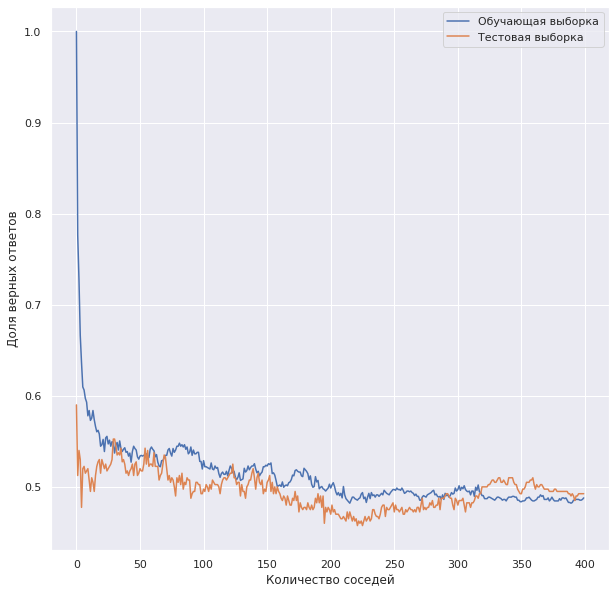

In [ ]:
neighbours_cnt = 400
train_scores = [None]*neighbours_cnt
test_scores = [None]*neighbours_cnt

for i in range(0, neighbours_cnt):
  clf = KNeighborsClassifier(n_neighbors=i+1)
  clf.fit(sources_train, target_train)
  train_scores[i] = clf.score(sources_train, target_train)
  test_scores[i] = clf.score(sources_test, target_test)

plt.plot(train_scores, label='Обучающая выборка')
plt.plot(test_scores, label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
np.var(data['quality']) # дисперсия целевой величины

0.6517605398308234

Вывод: качество вина - субъективная оценка, которую метод ближайших соседей не способен классифицировать на основании других технических признаков. C увеличением числа соседей, прослеживается явная тендеция к стремлению вероятности правильной классификации к 50%. Также это явление может объясняться небольшим значением дисперсии величины, отвечающей за качество.